In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data , columns = iris.feature_names)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
X_scaled = scaler.fit_transform(df)

In [6]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_scaled = pca.fit_transform(X_scaled)

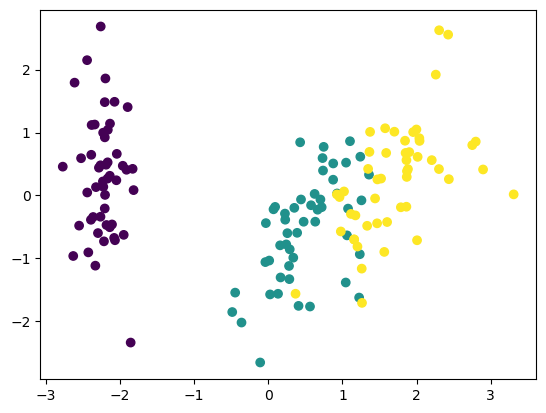

In [7]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

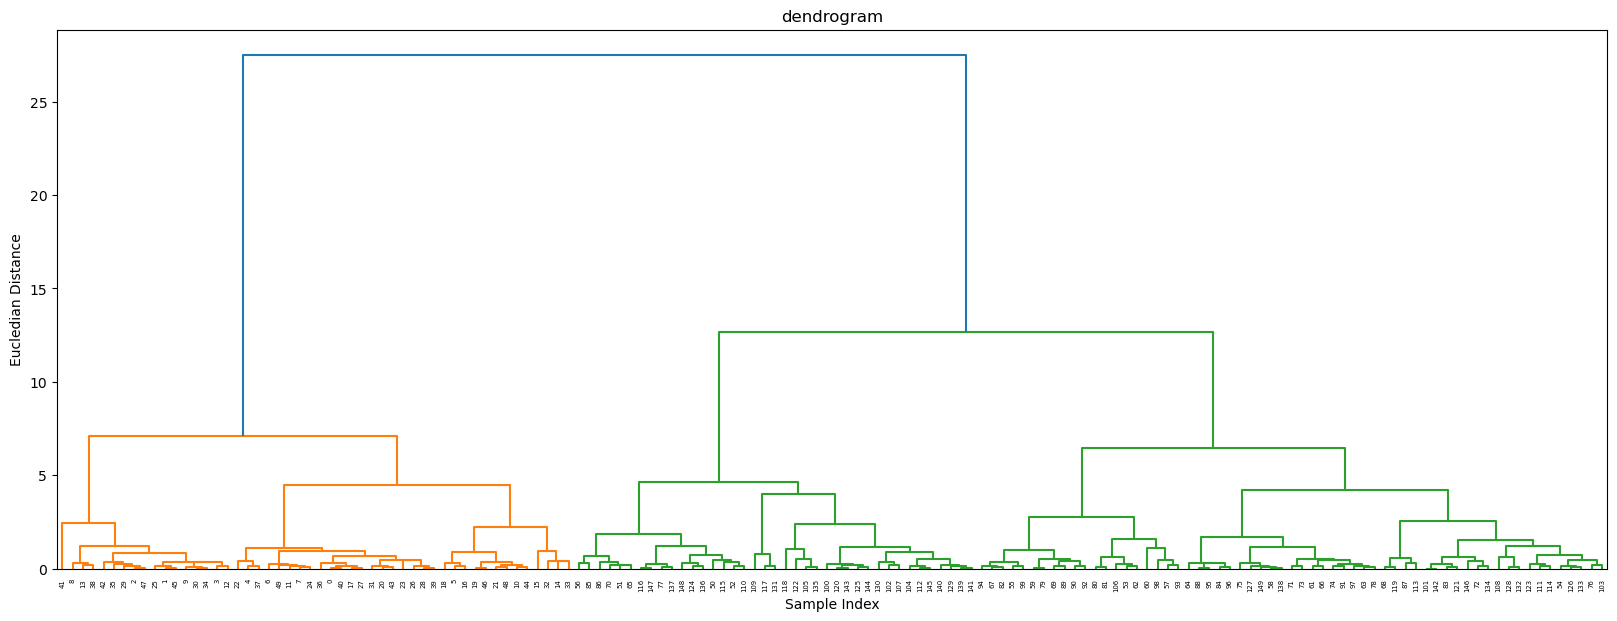

In [8]:
#Aglomerative Clustering
#Dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize = (20,7))
plt.title("dendrogram")
sc.dendrogram(sc.linkage(pca_scaled,method ='ward'))
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2,metric = 'euclidean',linkage='ward')

In [14]:
cluster.fit(pca_scaled)

AgglomerativeClustering(metric='euclidean')

In [15]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

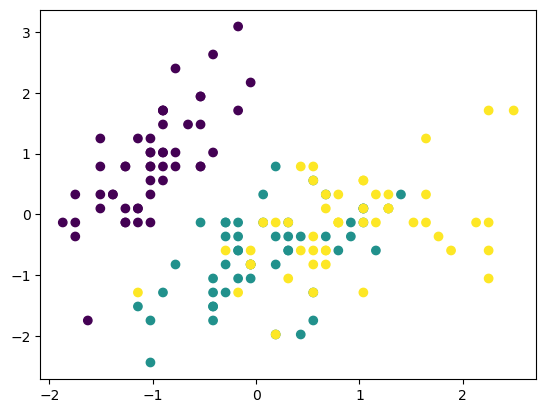

In [22]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=iris.target)

In [29]:
#Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters =k , metric = "euclidean",linkage="ward")
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

In [30]:
silhouette_coefficients

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

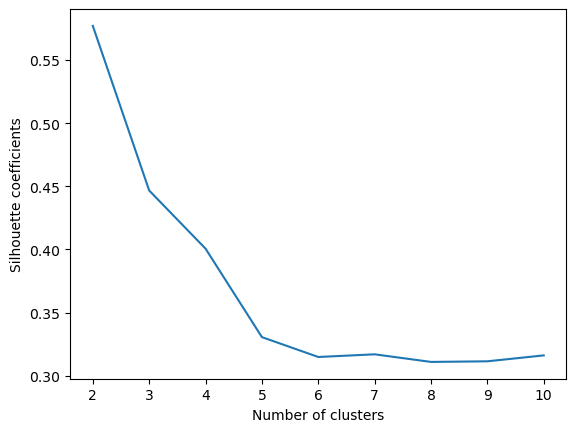

In [31]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficients")
plt.xlabel